In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd .read_csv("D:/ds/CSV_Files/coffee_shop_revenue.csv")
df 

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
...,...,...,...,...,...,...,...
1995,372,6.41,11,4,466.11,913,2816.85
1996,105,3.01,11,7,12.62,235,337.97
1997,89,5.28,16,9,376.64,310,951.34
1998,403,9.41,7,12,452.49,577,4266.21


In [4]:
x= df[['Number_of_Customers_Per_Day','Average_Order_Value', 'Marketing_Spend_Per_Day','Location_Foot_Traffic']]

y = df[['Daily_Revenue']]


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(x, y ,random_state=42, test_size=0.3)


model  = LinearRegression()
model.fit(X_train,Y_train)

y = model.predict(X_test)

In [6]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_pred = model.predict(X_test)

# R-squared score (higher is better, max=1)
r2 = r2_score(Y_test, y_pred)

# Mean Squared Error (lower is better)
mse = mean_squared_error(Y_test, y_pred)

print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² Score: 0.8917
Mean Squared Error: 97204.7820


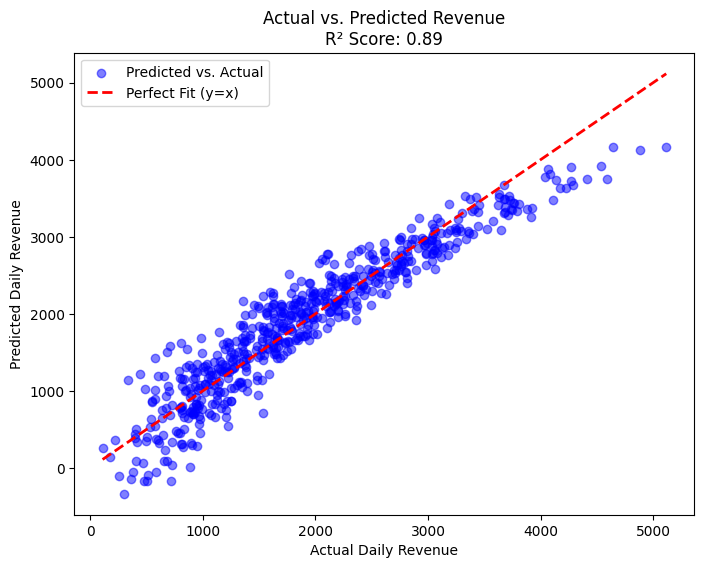

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs. Actual")

# **Plot a reference line (y = x) to check prediction accuracy**
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle="dashed", linewidth=2, label="Perfect Fit (y=x)")

# Labels and Title
plt.xlabel("Actual Daily Revenue")
plt.ylabel("Predicted Daily Revenue")
plt.title(f"Actual vs. Predicted Revenue\nR² Score: {r2:.2f}")
plt.legend()
plt.show()